   # Preprocessing

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
!pip install mpld3
import mpld3

     |████████████████████████████████| 201 kB 5.0 MB/s 


In [1]:
import matplotlib.pyplot as plt 

In [ ]:
Newspaper_2019_copy = pd.read_excel('2019_custom_extraction_all.xlsx')
Newspaper_2019 = Newspaper_2019_copy.copy()

In [ ]:
Newspaper_2019.drop(columns = 'Address', inplace = True) 

In [ ]:
Newspaper_2019

,Keywords 1,Section 1,Titulo 1,Fecha 1
0,"¡Boom!,Antena 3,Concursos,Programas concursos,...",icon,Dinero: El síndrome del nuevo rico: ganar mill...,2019-07-09
1,"¡Boom!,Antena 3,Concursos,Programas concursos,...",television,Los otros premios millonarios que el bote de ...,2019-07-08
2,"¡Boom!,Antena 3,Programas concursos,Atresmedia...",television,"Valentín, Erundino y Manu, de Los Lobos: “Nos...",2019-07-10
3,"¡Boom!,Antena 3,Programas concursos,Atresmedia...",opinion,Boom: Los Lobos | Opinión | EL PAÍS,2019-07-11
4,"¡Boom!,Antena 3,Programas concursos,Atresmedia...",articulo,Test: ¿Tú también te habrías llevado el mayor...,2019-07-10
...,...,...,...,...
75339,"Zumos,Zumos fruta,Naranja,Azúcar,Frutas,Condim...",buenavida,¿Engorda? ¿Es igual que un refresco? Y otras ...,2019-11-21
75340,"Zúrich,Albert Einstein,Suiza,Europa occidental...",sepa_usted,"Un paseo con el joven Einstein por Zúrich, la...",2019-12-01T17:41:13+01:00
75341,"‘Ndrangheta,Italia,Mafia,Crimen organizado,Eur...",internacional,Controlar el territorio | Internacional | EL ...,2019-03-10
75342,"‘Ndrangheta,Jaén,Italia,Granada,Mafia,Crimen o...",politica,La policía desactiva una célula de la ‘Ndrang...,2019-02-14


In [ ]:
Newspaper_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75344 entries, 0 to 75343
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Keywords 1  75344 non-null  object
 1   Section 1   75344 non-null  object
 2   Titulo 1    75344 non-null  object
 3   Fecha 1     75344 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [ ]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [ ]:
print(stopwords[:20])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("spanish")

In [ ]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [ ]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in Newspaper_2019['Keywords 1']:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [ ]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 1116636 items in vocab_frame


In [ ]:
vocab_frame.head()

,words
¡boom,¡boom
anten,antena
concurs,concursos
program,programas
concurs,concursos


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                 stop_words=stopwords,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(Newspaper_2019['Keywords 1']) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Wall time: 2min 16s
(75344, 1000)


In [ ]:
terms = tfidf_vectorizer.get_feature_names()

# Utilisation du modèle K-Means

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =4 ,init = 'k-means++')
km.fit_transform(tfidf_matrix)

array([[0.99767126, 1.0733914 , 1.06035726, 1.09328222],
       [0.97842642, 1.06761002, 1.05624945, 1.09325462],
       [0.98128255, 1.06517464, 1.0519662 , 1.0958463 ],
       ...,
       [0.9893768 , 1.06466456, 1.04158446, 1.07912701],
       [0.98867332, 1.05959863, 1.04962316, 1.0858968 ],
       [0.98968138, 1.05978283, 1.05166877, 1.0844013 ]])

In [ ]:
clusters = km.labels_.tolist()

In [ ]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(4):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :10]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    
   

Top terms per cluster:

Cluster 0 words: comunicación, economía, empresas, cultura, españa, madrid, opinión, sociales, europa, cine,
Cluster 1 words: américa, latinoamérica, brasil, sudamérica, sudamérica, latinoamérica, do, américa, norteamérica, política,
Cluster 2 words: elecciones, política, elecciones, generales, gobierno, partidos, cataluña, referéndum, españa, autonómica,
Cluster 3 words: deportes, fútbol, liga, competiciones, equipos, competiciones, fútbol, selección, fc, baloncesto,


In [ ]:
cluster_0=[]
cluster_1=[]
cluster_2=[]
cluster_3=[]
for i in range(4):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        if(i==0):
            cluster_0.append(' %s' % terms[ind])
        elif(i==1):
            cluster_1.append(' %s' % terms[ind])
        elif(i==2):
            cluster_2.append(' %s' % terms[ind])
        elif(i==3):
            cluster_3.append(' %s' % terms[ind])
        print(' %s' % terms[ind])

Cluster 0:
 comun
 econom
 empres
 cultur
 españ
 madr
 opinion
 social
 europ
 cin
 music
 socied
 polit
 television
 gent
 delit
 transport
 public
 asi
 medi
Cluster 1:
 amer
 latinoamer
 brasil
 sudamer
 sudamer latinoamer
 latinoamer amer
 do
 amer do
 norteamer
 polit
 amer latin
 latin
 sul
 do sul
 amer do sul
 do sul amer
 sul amer
 sudamer latinoamer amer
 mexic
 sul amer latin
Cluster 2:
 eleccion
 polit
 eleccion general
 general
 gobiern
 part
 cataluñ
 referendum
 españ
 autonom
 part polit
 pact
 electoral
 ultraderech
 pso
 europ
 pedr sanchez
 españ polit
 sanchez
 pedr
Cluster 3:
 deport
 futbol
 lig
 competicion
 equip
 competicion deport
 futbol equip
 seleccion
 fc
 baloncest
 lig futbol
 equip competicion
 organiz deport
 division
 lig santand
 real
 primer
 santand
 equip competicion deport
 primer division


In [ ]:
s=[]
test_word=['econom','cultur','social','music','cin','latinoamer', 'amer','brasil' ,'mexic', 'argentin', 'donald trump', 
           'polit', 'cataluñ','pedr','eleccion','deport','futbol','lig','equip','fc','primer']   
for word1 in test_word:
    for word in cluster_0:
        if (word.rfind(word1)!=-1):
            s.append(word)
    #print(s)
    score=len(s)/len(cluster_0)*100
    s=[]
    print(str(word1)+'  le score est: '+str(round(score, 2))+'%')

econom  le score est: 5.0%
cultur  le score est: 5.0%
social  le score est: 5.0%
music  le score est: 5.0%
cin  le score est: 5.0%
latinoamer  le score est: 0.0%
amer  le score est: 0.0%
brasil  le score est: 0.0%
mexic  le score est: 0.0%
argentin  le score est: 0.0%
donald trump  le score est: 0.0%
polit  le score est: 5.0%
cataluñ  le score est: 0.0%
pedr  le score est: 0.0%
eleccion  le score est: 0.0%
deport  le score est: 0.0%
futbol  le score est: 0.0%
lig  le score est: 0.0%
equip  le score est: 0.0%
fc  le score est: 0.0%
primer  le score est: 0.0%


In [ ]:
s=[]
test_word=['econom','cultur','social','music','cin','latinoamer', 'amer','brasil' ,'mexic', 'argentin', 'donald trump', 
           'polit', 'cataluñ','pedr','eleccion','deport','futbol','lig','equip','fc','primer']   
for word1 in test_word:
    for word in cluster_1:
        if (word.rfind(word1)!=-1):
            s.append(word)
    #print(s)
    score=len(s)/len(cluster_1)*100
    s=[]
    print(str(word1)+'  le score est: '+str(round(score, 2))+'%')

econom  le score est: 0.0%
cultur  le score est: 0.0%
social  le score est: 0.0%
music  le score est: 0.0%
cin  le score est: 0.0%
latinoamer  le score est: 20.0%
amer  le score est: 65.0%
brasil  le score est: 5.0%
mexic  le score est: 5.0%
argentin  le score est: 0.0%
donald trump  le score est: 0.0%
polit  le score est: 5.0%
cataluñ  le score est: 0.0%
pedr  le score est: 0.0%
eleccion  le score est: 0.0%
deport  le score est: 0.0%
futbol  le score est: 0.0%
lig  le score est: 0.0%
equip  le score est: 0.0%
fc  le score est: 0.0%
primer  le score est: 0.0%


In [ ]:
s=[]
test_word=['econom','cultur','social','music','cin','latinoamer', 'amer','brasil' ,'mexic', 'argentin', 'donald trump', 
           'polit', 'cataluñ','pedr','eleccion','deport','futbol','lig','equip','fc','primer']   
for word1 in test_word:
    for word in cluster_2:
        if (word.rfind(word1)!=-1):
            s.append(word)
    #print(s)
    score=len(s)/len(cluster_2)*100
    s=[]
    print(str(word1)+'  le score est: '+str(round(score, 2))+'%')

econom  le score est: 0.0%
cultur  le score est: 0.0%
social  le score est: 0.0%
music  le score est: 0.0%
cin  le score est: 0.0%
latinoamer  le score est: 0.0%
amer  le score est: 0.0%
brasil  le score est: 0.0%
mexic  le score est: 0.0%
argentin  le score est: 0.0%
donald trump  le score est: 0.0%
polit  le score est: 15.0%
cataluñ  le score est: 5.0%
pedr  le score est: 10.0%
eleccion  le score est: 10.0%
deport  le score est: 0.0%
futbol  le score est: 0.0%
lig  le score est: 0.0%
equip  le score est: 0.0%
fc  le score est: 0.0%
primer  le score est: 0.0%


In [ ]:
s=[]
test_word=['econom','cultur','social','music','cin','latinoamer', 'amer','brasil' ,'mexic', 'argentin', 'donald trump', 
           'polit', 'cataluñ','pedr','eleccion','deport','futbol','lig','equip','fc','primer']   
for word1 in test_word:
    for word in cluster_3:
        if (word.rfind(word1)!=-1):
            s.append(word)
    #print(s)
    score=len(s)/len(cluster_3)*100
    s=[]
    print(str(word1)+'  le score est: '+str(round(score, 2))+'%')

econom  le score est: 0.0%
cultur  le score est: 0.0%
social  le score est: 0.0%
music  le score est: 0.0%
cin  le score est: 0.0%
latinoamer  le score est: 0.0%
amer  le score est: 0.0%
brasil  le score est: 0.0%
mexic  le score est: 0.0%
argentin  le score est: 0.0%
donald trump  le score est: 0.0%
polit  le score est: 0.0%
cataluñ  le score est: 0.0%
pedr  le score est: 0.0%
eleccion  le score est: 5.0%
deport  le score est: 20.0%
futbol  le score est: 15.0%
lig  le score est: 15.0%
equip  le score est: 20.0%
fc  le score est: 5.0%
primer  le score est: 10.0%


In [ ]:
Newspaper_2019['Clusters']=clusters

In [ ]:
date = []
for d in Newspaper_2019['Fecha 1']:
    date.append(d[0:10])

In [ ]:
Newspaper_2019.drop('Fecha 1',axis=1,inplace=True)
Newspaper_2019['Date']=date #Newspaper_2019['Date'] = pd.to_datetime(Newspaper_2019['Date'], format='%Y-%m-%d')

In [ ]:
Newspaper_2019['Date']

0        2019-07-09
1        2019-07-08
2        2019-07-10
3        2019-07-11
4        2019-07-10
            ...    
75339    2019-11-21
75340    2019-12-01
75341    2019-03-10
75342    2019-02-14
75343    2019-12-20
Name: Date, Length: 75344, dtype: object

In [ ]:
Newspaper_2019['Trimestre']=np.zeros(75344)

In [ ]:
from datetime import datetime
for i in range(75344):
    if (datetime.strptime(Newspaper_2019['Date'][i], '%Y-%m-%d') <=  datetime.strptime('2019-03-31', '%Y-%m-%d')):
        Newspaper_2019['Trimestre'][i]='T1'
    elif (  datetime.strptime('2019-04-01', '%Y-%m-%d')<= datetime.strptime(Newspaper_2019['Date'][i], '%Y-%m-%d') <=  datetime.strptime('2019-06-30', '%Y-%m-%d')): 
        Newspaper_2019['Trimestre'][i]='T2'
    elif (  datetime.strptime('2019-07-01', '%Y-%m-%d')<= datetime.strptime(Newspaper_2019['Date'][i], '%Y-%m-%d') <=  datetime.strptime('2019-09-30', '%Y-%m-%d')): 
        Newspaper_2019['Trimestre'][i]='T3'
    elif (  datetime.strptime('2019-10-01', '%Y-%m-%d')<= datetime.strptime(Newspaper_2019['Date'][i], '%Y-%m-%d') <=  datetime.strptime('2019-12-31', '%Y-%m-%d')): 
        Newspaper_2019['Trimestre'][i]='T4'

<ipython-input-26-4ecbf764b8c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newspaper_2019['Trimestre'][i]='T3'
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-26-4ecbf764b8c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newspaper_2019['Trimestre'][i]='T1'
<ipython-input-26-4ecbf764b8c9>:6: SettingWi

In [ ]:
Newspaper_2019

,Keywords 1,Section 1,Titulo 1,Clusters,Date,Trimestre
0,"¡Boom!,Antena 3,Concursos,Programas concursos,...",icon,Dinero: El síndrome del nuevo rico: ganar mill...,0,2019-07-09,T3
1,"¡Boom!,Antena 3,Concursos,Programas concursos,...",television,Los otros premios millonarios que el bote de ...,0,2019-07-08,T3
2,"¡Boom!,Antena 3,Programas concursos,Atresmedia...",television,"Valentín, Erundino y Manu, de Los Lobos: “Nos...",0,2019-07-10,T3
3,"¡Boom!,Antena 3,Programas concursos,Atresmedia...",opinion,Boom: Los Lobos | Opinión | EL PAÍS,0,2019-07-11,T3
4,"¡Boom!,Antena 3,Programas concursos,Atresmedia...",articulo,Test: ¿Tú también te habrías llevado el mayor...,0,2019-07-10,T3
...,...,...,...,...,...,...
75339,"Zumos,Zumos fruta,Naranja,Azúcar,Frutas,Condim...",buenavida,¿Engorda? ¿Es igual que un refresco? Y otras ...,0,2019-11-21,T4
75340,"Zúrich,Albert Einstein,Suiza,Europa occidental...",sepa_usted,"Un paseo con el joven Einstein por Zúrich, la...",0,2019-12-01,T4
75341,"‘Ndrangheta,Italia,Mafia,Crimen organizado,Eur...",internacional,Controlar el territorio | Internacional | EL ...,0,2019-03-10,T1
75342,"‘Ndrangheta,Jaén,Italia,Granada,Mafia,Crimen o...",politica,La policía desactiva una célula de la ‘Ndrang...,0,2019-02-14,T1


# Visualisation des données

Cluster 0 : Sujets générales (culture , cinéma , musique , économie )

In [ ]:
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 0) & (Newspaper_2019['Trimestre']== 'T1')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 0) & (Newspaper_2019['Trimestre']== 'T2')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 0) & (Newspaper_2019['Trimestre']== 'T3')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 0) & (Newspaper_2019['Trimestre']== 'T4')].shape)

(13171, 6)
(12814, 6)
(12528, 6)
(12524, 6)


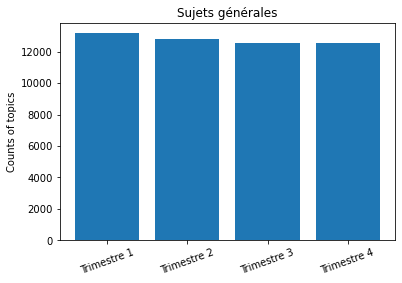

In [ ]:
import pylab
x = ['T1','T2','T3','T4']
y0=[13171,12814,12528,12524]
fig = plt.figure()
plt.bar(x, y0)
plt.ylabel('Counts of topics')
plt.title('Sujets générales')
BarName=['Trimestre 1','Trimestre 2','Trimestre 3','Trimestre 4']
pylab.xticks(x, BarName, rotation=20)
plt.show()

Cluster 1 : Les relations étrangères avec l'Amérique latine 

In [ ]:
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 1) & (Newspaper_2019['Trimestre']== 'T1')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 1) & (Newspaper_2019['Trimestre']== 'T2')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 1) & (Newspaper_2019['Trimestre']== 'T3')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 1) & (Newspaper_2019['Trimestre']== 'T4')].shape)

(1861, 6)
(1723, 6)
(1536, 6)
(1500, 6)


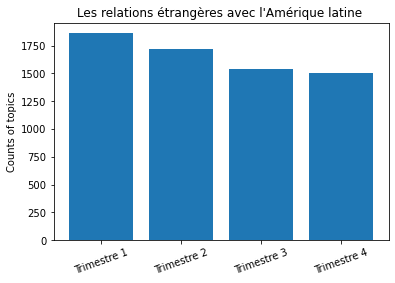

In [ ]:
import pylab
x = ['T1','T2','T3','T4']
y1=[1861,1723,1536,1500]
fig = plt.figure()
plt.bar(x, y1)
plt.ylabel('Counts of topics')
plt.title('''Les relations étrangères avec l'Amérique latine ''')
BarName=['Trimestre 1','Trimestre 2','Trimestre 3','Trimestre 4']
pylab.xticks(x, BarName, rotation=20)
plt.show()

Cluster 2 : Les sujets politiques

In [ ]:
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 2) & (Newspaper_2019['Trimestre']== 'T1')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 2) & (Newspaper_2019['Trimestre']== 'T2')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 2) & (Newspaper_2019['Trimestre']== 'T3')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 2) & (Newspaper_2019['Trimestre']== 'T4')].shape)

(2681, 6)
(3924, 6)
(2109, 6)
(2703, 6)


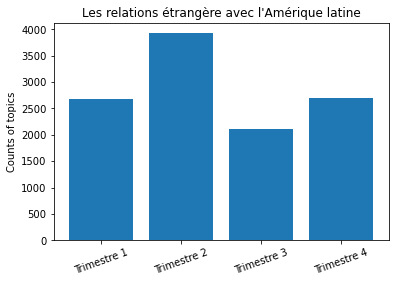

In [ ]:
import pylab
x = ['T1','T2','T3','T4']
y2=[2681,3924,2109,2703]
fig = plt.figure()
plt.bar(x, y2)
plt.ylabel('Counts of topics')
plt.title('''Les relations étrangère avec l'Amérique latine''')
BarName=['Trimestre 1','Trimestre 2','Trimestre 3','Trimestre 4']
pylab.xticks(x, BarName, rotation=20)
plt.show()

Cluster 3 : Football 

In [ ]:
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 3) & (Newspaper_2019['Trimestre']== 'T1')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 3) & (Newspaper_2019['Trimestre']== 'T2')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 3) & (Newspaper_2019['Trimestre']== 'T3')].shape)
print(Newspaper_2019[(Newspaper_2019['Clusters'] == 3) & (Newspaper_2019['Trimestre']== 'T4')].shape)

(1541, 6)
(1611, 6)
(1425, 6)
(1554, 6)


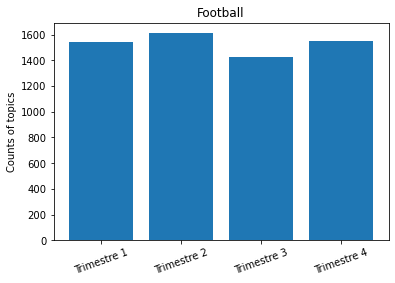

In [ ]:
import pylab
x = ['T1','T2','T3','T4']
y3=[1541,1611,1425,1554]
fig = plt.figure()
plt.bar(x, y3)
plt.ylabel('Counts of topics')
plt.title('Football')
BarName=['Trimestre 1','Trimestre 2','Trimestre 3','Trimestre 4']
pylab.xticks(x, BarName, rotation=20)
plt.show()

Cluster 4 : Sujets Economiques

<BarContainer object of 4 artists>

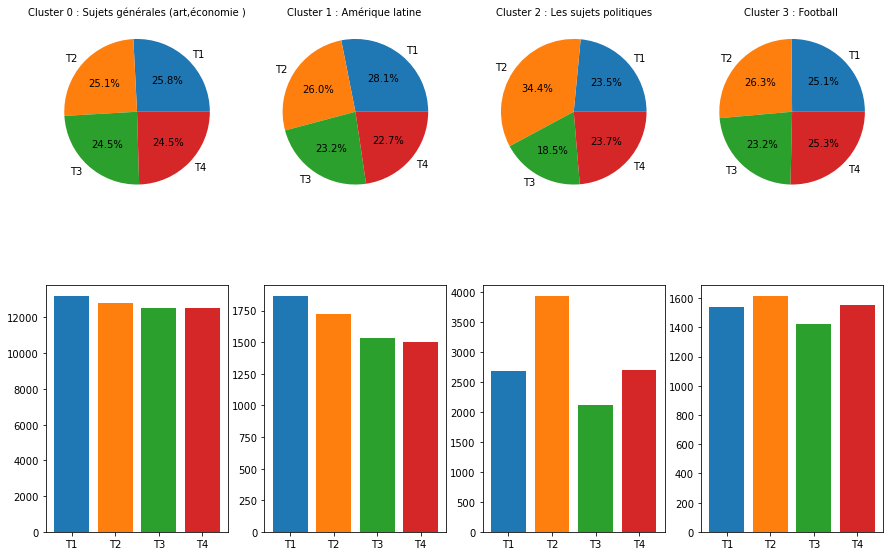

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axs = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(15,10)
BarName=['T1','T2','T3','T4']


axs[0][0].pie(y0, labels=x, autopct='%1.1f%%')
axs[0][0].set_title('Cluster 0 : Sujets générales (art,économie )',fontsize=10)
axs[0][1].pie(y1, labels=x, autopct='%1.1f%%')
axs[0][1].set_title( '''Cluster 1 : Amérique latine ''',fontsize=10)
axs[0][2].pie(y2, labels=x, autopct='%1.1f%%')
axs[0][2].set_title('Cluster 2 : Les sujets politiques', fontsize=10)
axs[0][3].pie(y3, labels=x, autopct='%1.1f%%')
axs[0][3].set_title('Cluster 3 : Football ', fontsize=10)


axs[1][0].bar(BarName, y0, color=colors)
axs[1][1].bar(BarName, y1, color=colors)
axs[1][2].bar(BarName, y2, color=colors)
axs[1][3].bar(BarName, y3, color=colors)